<a href="https://colab.research.google.com/github/iris-obed/AI-Data-Engineer-Assignments/blob/master/Binary_classification_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem 1**: Select features and categories for practice

Accuracy: 0.83


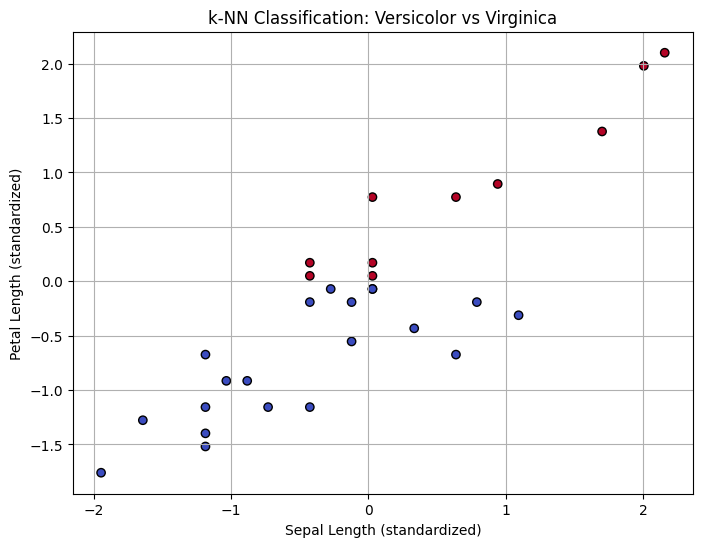

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda x: target_names[x])

# Filter only versicolor (1) and virginica (2)
df_binary = df[df['target'].isin([1, 2])]

# Select sepal length (0) and petal length (2)
X_binary = df_binary.iloc[:, [0, 2]].values
y_binary = df_binary['target'].values

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train using k-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_pred, cmap='coolwarm', edgecolor='k')
plt.xlabel("Sepal Length (standardized)")
plt.ylabel("Petal Length (standardized)")
plt.title("k-NN Classification: Versicolor vs Virginica")
plt.grid(True)
plt.show()

#**Problem 2**: Data analysis

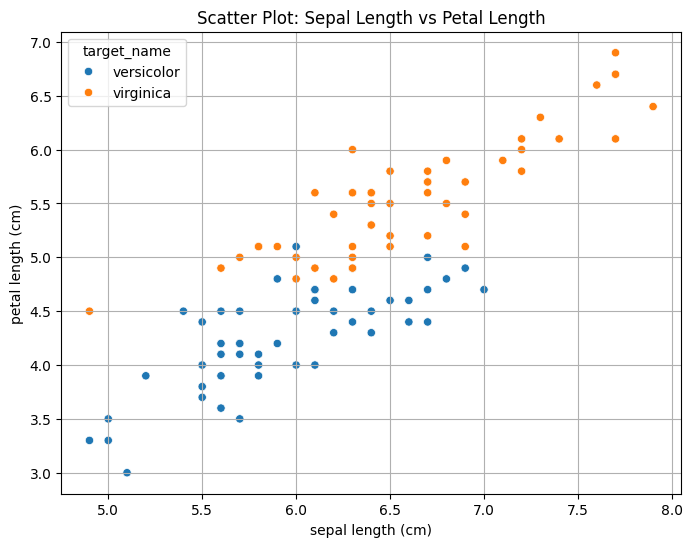

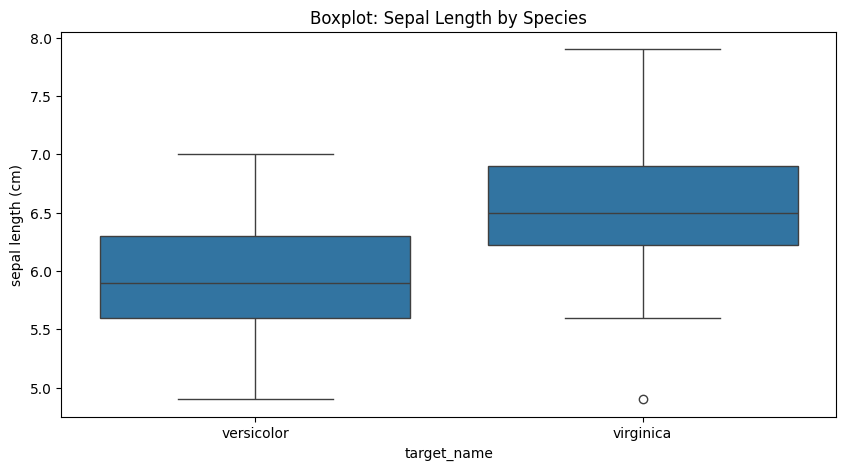

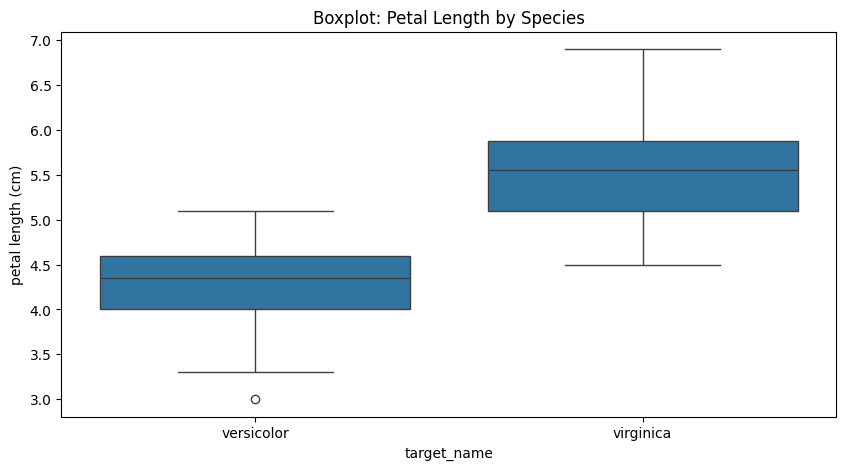

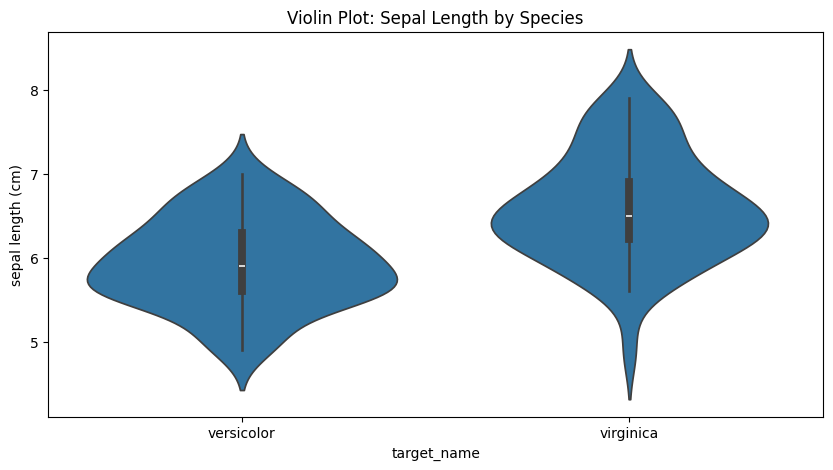

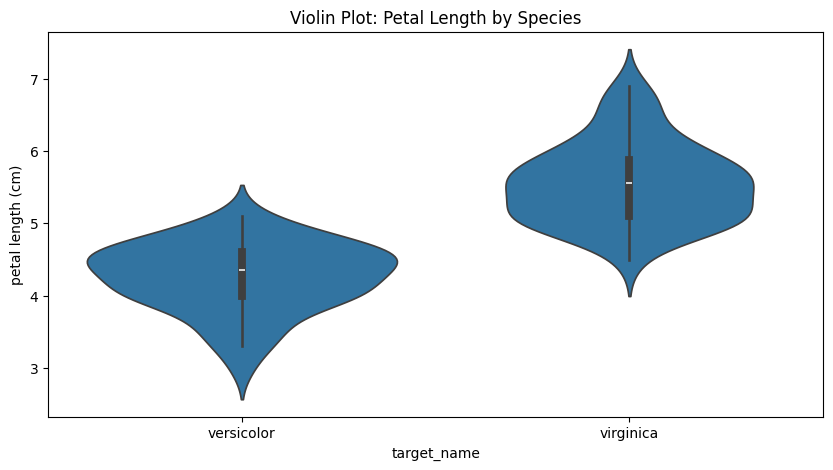

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda x: target_names[x])

# Filter only versicolor (1) and virginica (2)
df_binary = df[df['target'].isin([1, 2])]

# Select sepal_length and petal_length
df_binary = df_binary[['sepal length (cm)', 'petal length (cm)', 'target_name']]

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_binary, x='sepal length (cm)', y='petal length (cm)', hue='target_name')
plt.title("Scatter Plot: Sepal Length vs Petal Length")
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_binary, x='target_name', y='sepal length (cm)')
plt.title("Boxplot: Sepal Length by Species")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_binary, x='target_name', y='petal length (cm)')
plt.title("Boxplot: Petal Length by Species")
plt.show()

# Violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(data=df_binary, x='target_name', y='sepal length (cm)')
plt.title("Violin Plot: Sepal Length by Species")
plt.show()

plt.figure(figsize=(10, 5))
sns.violinplot(data=df_binary, x='target_name', y='petal length (cm)')
plt.title("Violin Plot: Petal Length by Species")
plt.show()

#**Problem 3**: Division of preprocessing/training data and verification data

In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for analysis
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda x: target_names[x])

# Filter only versicolor (1) and virginica (2)
df_binary = df[df['target'].isin([1, 2])]

# Select sepal length and petal length
X_selected = df_binary[['sepal length (cm)', 'petal length (cm)']].values
y_selected = df_binary['target'].values

# Split into training (75%) and validation (25%)
X_train, X_val, y_train, y_val = train_test_split(
    X_selected, y_selected, test_size=0.25, random_state=42, stratify=y_selected
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (75, 2)
X_val shape: (25, 2)
y_train shape: (75,)
y_val shape: (25,)


#**Problem 4**: Pretreatment/Standardization

In [5]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Create DataFrame for filtering
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda x: target_names[x])

# Filter only versicolor (1) and virginica (2)
df_binary = df[df['target'].isin([1, 2])]

# Select sepal length and petal length
X_selected = df_binary[['sepal length (cm)', 'petal length (cm)']].values
y_selected = df_binary['target'].values

# Split into training and validation (75/25)
X_train, X_val, y_train, y_val = train_test_split(
    X_selected, y_selected, test_size=0.25, random_state=42, stratify=y_selected
)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Output for confirmation
print("Before standardization (first training sample):", X_train[0])
print("After standardization (first training sample):", X_train_scaled[0])

Before standardization (first training sample): [6.4 5.3]
After standardization (first training sample): [0.08837827 0.42173708]


#**Problem 5**: Learning and estimation

In [7]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load dataset and filter versicolor & virginica
iris = datasets.load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda x: target_names[x])
df_binary = df[df['target'].isin([1, 2])]

# Select features
X_selected = df_binary[['sepal length (cm)', 'petal length (cm)']].values
y_selected = df_binary['target'].values

# Split data
X_train, X_val, y_train, y_val = train_test_split(
    X_selected, y_selected, test_size=0.25, random_state=42, stratify=y_selected
)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Try k = 1, 3, 5
for k in [1, 3, 5]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{k}-NN accuracy: {accuracy:.2f}")

1-NN accuracy: 0.84
3-NN accuracy: 0.80
5-NN accuracy: 0.84


#**Problem 6**: Evaluation

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Use the best k (for example, k = 3)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)

# Evaluation metrics
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred, pos_label=2)
rec = recall_score(y_val, y_pred, pos_label=2)
f1 = f1_score(y_val, y_pred, pos_label=2)
cm = confusion_matrix(y_val, y_pred)

# Output results
print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")
print(f"F1-score:  {f1:.2f}")
print("Confusion Matrix:")
print(cm)

Accuracy:  0.80
Precision: 0.73
Recall:    0.92
F1-score:  0.81
Confusion Matrix:
[[ 9  4]
 [ 1 11]]


Evaluation Metrics for Binary Classification

#**Accuracy**

The proportion of all correct predictions (both positives and negatives) out of total predictions.

Accuracy = (TP + TN) / (TP + TN + FP + FN)



**TP**: True Positive

**TN**: True Negative

**FP**: False Positive

**FN**: False Negative


#**Precision**
Measures how many of the predicted positives were actually correct. It focuses on the quality of positive predictions.

Precision = (TP) / (TP + FP)

#**Recall**

Measures how many of the actual positives were correctly identified. It focuses on the coverage of actual positive cases.

Recall = (TP) / (TP + FN)

#**F1-Score**

The harmonic mean of precision and recall, useful when you need a balance between both.

F1 = 2 * [(Precision * Recall) / (Precision + Recall)]

⸻

Confusion Matrix

A table showing prediction results:

                Predicted

               | Class 1 | Class 2
    -------------------------------
    Actual 1   |   TN    |   FP
    Actual 2   |   FN    |   TP


#**Problem 7**: Visualization

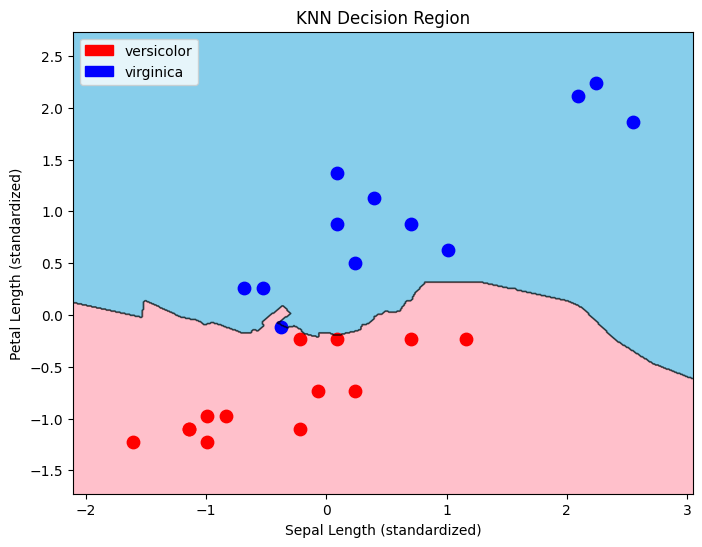

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Filter only versicolor (1) and virginica (2)
X = X[y != 0]
y = y[y != 0]
y = y - 1

# Select two features: sepal length and petal length
X = X[:, [0, 2]]

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0, stratify=y)

# Standardize
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)

# Train a KNN model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_std, y_train)

# Decision region function
def decision_region(X, y, model, step=0.01, title="Decision Region", xlabel="Feature 1", ylabel="Feature 2", target_names=["versicolor", "virginica"]):
    scatter_color = ["red", "blue"]
    contourf_color = ["pink", "skyblue"]
    n_class = 2

    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 0.5, np.max(X[:, 0]) + 0.5, step),
        np.arange(np.min(X[:, 1]) - 0.5, np.max(X[:, 1]) + 0.5, step),
    )
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class - 1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class - 1, colors="k", linewidths=1, alpha=0.5)

    for i, target in enumerate(np.unique(y)):
        plt.scatter(
            X[y == target][:, 0],
            X[y == target][:, 1],
            s=80,
            color=scatter_color[i],
            label=target_names[i],
            marker="o",
        )

    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()

# Plot decision region
decision_region(X_val_std, y_val, model, title="KNN Decision Region", xlabel="Sepal Length (standardized)", ylabel="Petal Length (standardized)")

#**Problem 8**: Learning by other methods

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load iris dataset and select only versicolor and virginica (binary classification)
iris = load_iris()
X = iris.data[:, [0, 2]]  # sepal_length and petal_length
y = iris.target

# Filter for binary classification (class 1 and 2)
binary_mask = (y == 1) | (y == 2)
X = X[binary_mask]
y = y[binary_mask]
y = y - 1  # Convert to 0 and 1

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_val_std = scaler.transform(X_val)

# Define classifiers
classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "LogisticRegression": LogisticRegression(),
    "SVM": SVC(),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier()
}

# Evaluate all classifiers
results = []

for name, clf in classifiers.items():
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_val_std)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_val, y_pred),
        "Precision": precision_score(y_val, y_pred),
        "Recall": recall_score(y_val, y_pred),
        "F1 Score": f1_score(y_val, y_pred)
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,KNN,0.80,0.800000,0.727273,0.761905
1,LogisticRegression,0.84,0.818182,0.818182,0.818182
2,SVM,0.84,0.818182,0.818182,0.818182
3,DecisionTree,0.84,0.888889,0.727273,0.800000
4,RandomForest,0.80,0.875000,0.636364,0.736842


#**Problem 9**: Comparison with and without standardization


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
X = X[y != 0]
y = y[y != 0] - 1
X = X[:, [0, 2]]

# Split the data
X_train_raw, X_val_raw, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardization
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train_raw)
X_val_std = scaler.transform(X_val_raw)

# Models
models = {
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Evaluation
def evaluate_models(X_train, X_val, title_suffix=""):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        results[name + title_suffix] = {
            "accuracy": accuracy_score(y_val, y_pred),
            "precision": precision_score(y_val, y_pred),
            "recall": recall_score(y_val, y_pred),
            "f1": f1_score(y_val, y_pred),
            "model": model
        }
    return results

results_std = evaluate_models(X_train_std, X_val_std, " (Standardized)")
results_raw = evaluate_models(X_train_raw, X_val_raw, " (Raw)")

# Combine the results in a single table
import pandas as pd
all_results = {**results_raw, **results_std}
df_results = pd.DataFrame({k: {m: round(v[m], 2) for m in ["accuracy", "precision", "recall", "f1"]}
                           for k, v in all_results.items()}).T
df_results

,accuracy,precision,recall,f1
KNN (Raw),0.80,0.88,0.64,0.74
Logistic Regression (Raw),0.84,0.82,0.82,0.82
SVM (Raw),0.84,0.82,0.82,0.82
Decision Tree (Raw),0.84,0.89,0.73,0.80
Random Forest (Raw),0.84,0.89,0.73,0.80
KNN (Standardized),0.80,0.88,0.64,0.74
Logistic Regression (Standardized),0.84,0.82,0.82,0.82
SVM (Standardized),0.84,0.82,0.82,0.82
Decision Tree (Standardized),0.84,0.89,0.73,0.80
Random Forest (Standardized),0.80,0.88,0.64,0.74


#**Problem 10**: Highly accurate method using all objective variables



==== K-Nearest Neighbors ====
Accuracy: 0.93
Classification Report (macro and micro average):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.92      0.85      0.88        13
   virginica       0.86      0.92      0.89        13

    accuracy                           0.93        45
   macro avg       0.92      0.92      0.92        45
weighted avg       0.93      0.93      0.93        45



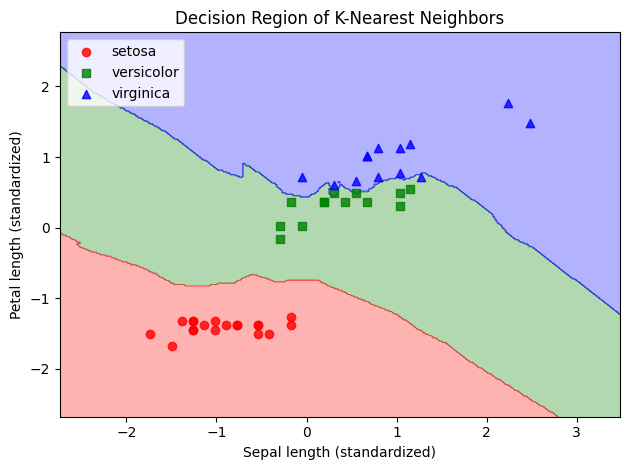


==== Logistic Regression ====
Accuracy: 1.00
Classification Report (macro and micro average):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



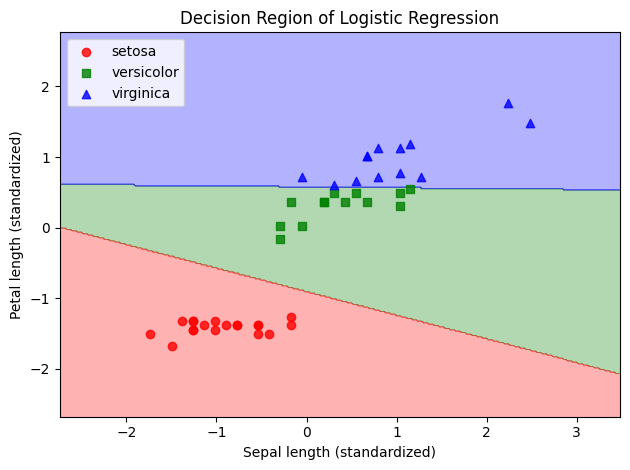


==== Support Vector Machine ====
Accuracy: 1.00
Classification Report (macro and micro average):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



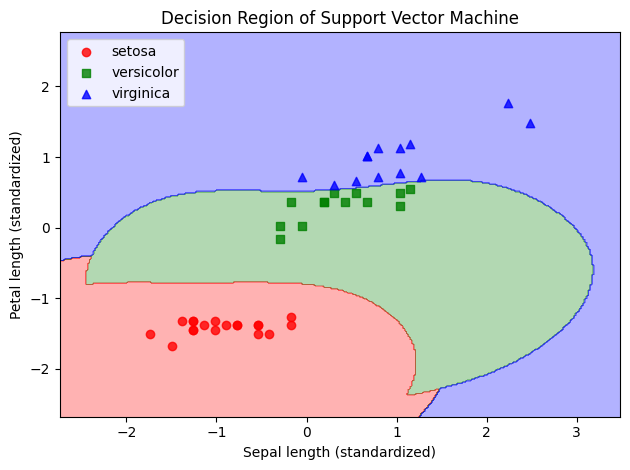


==== Decision Tree ====
Accuracy: 0.96
Classification Report (macro and micro average):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.87      1.00      0.93        13
   virginica       1.00      0.85      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



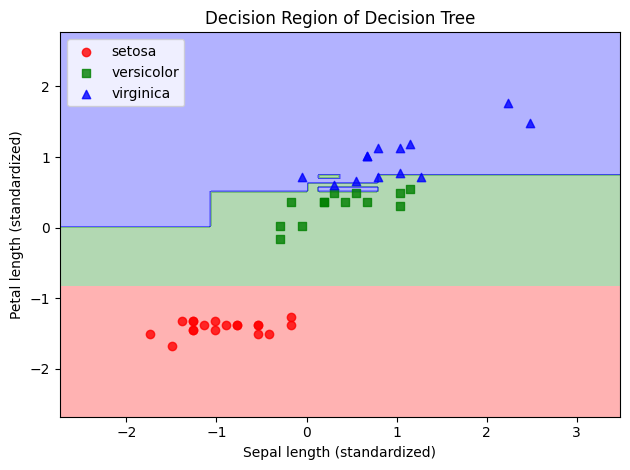


==== Random Forest ====
Accuracy: 1.00
Classification Report (macro and micro average):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



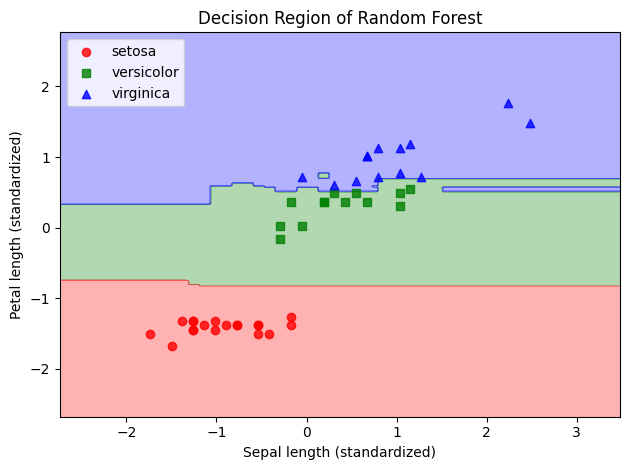

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, [0, 2]]
y = iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Classifiers
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Function to plot decision regions
def plot_decision_region(X, y, classifier, title):
    markers = ('o', 's', '^')
    colors = ('red', 'green', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx], label=iris.target_names[cl])
    plt.xlabel("Sepal length (standardized)")
    plt.ylabel("Petal length (standardized)")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Train, evaluate and visualize each model
for name, model in models.items():
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)

    print(f"\n==== {name} ====")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report (macro and micro average):")
    print(classification_report(y_test, y_pred, target_names=iris.target_names, digits=2))
    plot_decision_region(X_test_std, y_test, model, f"Decision Region of {name}")